In [14]:
!pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 3.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)


 76%|███████▌  | 3559/4685 [05:14<01:45, 10.65it/s]

  Created wheel for fasttext: filename=fasttext-0.9.3-cp310-cp310-linux_x86_64.whl size=4296188 sha256=abecbabbedb68913bb6532610b68145c78d41dfcd9ca9fa64c0c7796d6da2260
  Stored in directory: /root/.cache/pip/wheels/0d/a2/00/81db54d3e6a8199b829d58e02cec2ddb20ce3e59fad8d3c92a
Successfully built fasttext


In [1]:
import pandas as pd

splits = {'train': 'train.csv', 'test': 'test.csv'}

In [2]:
df_train = pd.read_csv("hf://datasets/okite97/news-data/" + splits["train"])
df_test = pd.read_csv("hf://datasets/okite97/news-data/" + splits["test"])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [3]:
df_train = df_train.dropna()
df_test = df_test.dropna()

In [4]:
df_train.head()

,Title,Excerpt,Category
0,"Uefa Opens Proceedings against Barcelona, Juve...",Uefa has opened disciplinary proceedings again...,sports
1,Amazon Blames Inflation as It Increases Cost o...,The increases are steeper than the 17 percent ...,business
2,Nigeria’s Parliament Passes Amended Electoral ...,Nigeria's Senate on Tuesday passed the harmoni...,politics
3,Nigeria: Lagos Governor Tests Positive for Cov...,"The Lagos State Governor, Mr. Babajide Sanwo-O...",health
4,South Africa Calls For Calm as Electoral Refor...,South Africa has raised concerns about the det...,politics


In [5]:
df_test.head()

,Title,Excerpt,Category
0,Nigeria: Cross River Governor Ayade Dumps PDP ...,"Cross River State Governor, Ben Ayade has defe...",politics
1,Electoral Bill: Nigeria Senate Mobilises to Ov...,Nigerians have not heard the last of President...,politics
2,Nigeria: Central Bank Increases Forex Allocati...,The Central Bank of Nigeria (CBN) on Sunday an...,business
3,Nigeria to Set Up Fund to Cover 83m Poor Citiz...,President Muhammadu Buhari has signed into law...,health
4,World Bank Revises Sub-Saharan Africa’s Growth...,The World Bank has revised its growth forecast...,business


In [6]:
import pandas as pd
import spacy
import string

# Загрузка модели spaCy для английского языка
nlp = spacy.load('en_core_web_sm')

# Функция для очистки текста
def clean_text(text):
    if isinstance(text, str):
        # Приведение к нижнему регистру
        text = text.lower()
        # Удаление пунктуации
        text = text.translate(str.maketrans('', '', string.punctuation))
        # Токенизация и удаление стоп-слов
        doc = nlp(text)
        cleaned_tokens = [token.text for token in doc if token.is_alpha and not token.is_stop]
        return ' '.join(cleaned_tokens)
    return ''

# Функция для создания числового представления категорий
def map_category_to_int(df, category_to_int=None):
    if category_to_int is None:
        # Если словарь не передан, создаем его на основе текущего датафрейма
        category_to_int = {category: idx for idx, category in enumerate(df['Category'].unique())}
    # Применяем словарь к столбцу 'Category'
    df['Category_int'] = df['Category'].map(category_to_int)
    return df, category_to_int

# Применение очистки текста к столбцам Title и Excerpt
df_train['Title_cleaned'] = df_train['Title'].apply(clean_text)
df_train['Excerpt_cleaned'] = df_train['Excerpt'].apply(clean_text)

df_test['Title_cleaned'] = df_test['Title'].apply(clean_text)
df_test['Excerpt_cleaned'] = df_test['Excerpt'].apply(clean_text)

# Добавление числового представления категорий
df_train, category_to_int = map_category_to_int(df_train)
df_test, _ = map_category_to_int(df_test, category_to_int)  # Используем тот же словарь


In [7]:
df_train.head()

,Title,Excerpt,Category,Title_cleaned,Excerpt_cleaned,Category_int
0,"Uefa Opens Proceedings against Barcelona, Juve...",Uefa has opened disciplinary proceedings again...,sports,uefa opens proceedings barcelona juventus real...,uefa opened disciplinary proceedings barcelona...,0
1,Amazon Blames Inflation as It Increases Cost o...,The increases are steeper than the 17 percent ...,business,amazon blames inflation increases cost prime e...,increases steeper percent jump prime membershi...,1
2,Nigeria’s Parliament Passes Amended Electoral ...,Nigeria's Senate on Tuesday passed the harmoni...,politics,nigeria parliament passes amended electoral bill,nigerias senate tuesday passed harmonised clau...,2
3,Nigeria: Lagos Governor Tests Positive for Cov...,"The Lagos State Governor, Mr. Babajide Sanwo-O...",health,nigeria lagos governor tests positive kaduna g...,lagos state governor mr babajide sanwoolu test...,3
4,South Africa Calls For Calm as Electoral Refor...,South Africa has raised concerns about the det...,politics,south africa calls calm electoral reform prote...,south africa raised concerns deteriorating sit...,2


In [8]:
df_test.head()

,Title,Excerpt,Category,Title_cleaned,Excerpt_cleaned,Category_int
0,Nigeria: Cross River Governor Ayade Dumps PDP ...,"Cross River State Governor, Ben Ayade has defe...",politics,nigeria cross river governor ayade dumps pdp apc,cross river state governor ben ayade defected ...,2
1,Electoral Bill: Nigeria Senate Mobilises to Ov...,Nigerians have not heard the last of President...,politics,electoral bill nigeria senate mobilises overri...,nigerians heard president muhammadu buharis re...,2
2,Nigeria: Central Bank Increases Forex Allocati...,The Central Bank of Nigeria (CBN) on Sunday an...,business,nigeria central bank increases forex allocatio...,central bank nigeria cbn sunday announced incr...,1
3,Nigeria to Set Up Fund to Cover 83m Poor Citiz...,President Muhammadu Buhari has signed into law...,health,nigeria set fund cover m poor citizens buhari ...,president muhammadu buhari signed law recently...,3
4,World Bank Revises Sub-Saharan Africa’s Growth...,The World Bank has revised its growth forecast...,business,world bank revises subsaharan africa growth fo...,world bank revised growth forecast subsaharan ...,1


<Axes: >

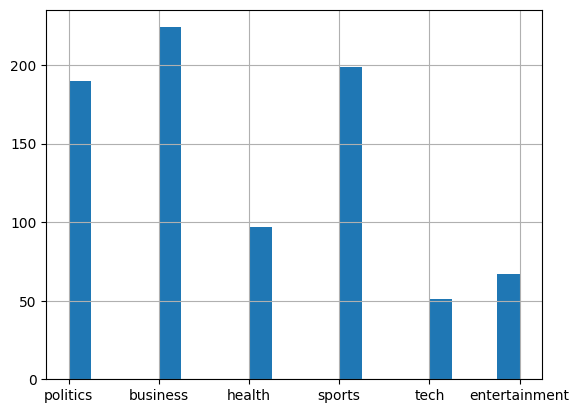

In [9]:
df_test['Category'].hist(bins=20)

In [10]:
df_train.head()

,Title,Excerpt,Category,Title_cleaned,Excerpt_cleaned,Category_int
0,"Uefa Opens Proceedings against Barcelona, Juve...",Uefa has opened disciplinary proceedings again...,sports,uefa opens proceedings barcelona juventus real...,uefa opened disciplinary proceedings barcelona...,0
1,Amazon Blames Inflation as It Increases Cost o...,The increases are steeper than the 17 percent ...,business,amazon blames inflation increases cost prime e...,increases steeper percent jump prime membershi...,1
2,Nigeria’s Parliament Passes Amended Electoral ...,Nigeria's Senate on Tuesday passed the harmoni...,politics,nigeria parliament passes amended electoral bill,nigerias senate tuesday passed harmonised clau...,2
3,Nigeria: Lagos Governor Tests Positive for Cov...,"The Lagos State Governor, Mr. Babajide Sanwo-O...",health,nigeria lagos governor tests positive kaduna g...,lagos state governor mr babajide sanwoolu test...,3
4,South Africa Calls For Calm as Electoral Refor...,South Africa has raised concerns about the det...,politics,south africa calls calm electoral reform prote...,south africa raised concerns deteriorating sit...,2


In [11]:
# Объединение Title и Excerpt в один столбец
df_train['Text'] = df_train['Title'] + " " + df_train['Excerpt']
df_test['Text'] = df_test['Title'] + " " + df_test['Excerpt']

df_train['Text_cleaned'] = df_train['Title_cleaned'] + " " + df_train['Excerpt_cleaned']
df_test['Text_cleaned'] = df_test['Title_cleaned'] + " " + df_test['Excerpt_cleaned']

BoW and tf-idf


=== BoW на очищенных данных ===
Количество пропущенных слов в тестовом наборе: 997
F1-score: 0.8610
Confusion Matrix:
[[196   0   1   2   0   0]
 [  2 199   8   1  12   2]
 [  0  15 173   1   0   1]
 [  2   8   8  79   0   0]
 [  1  26   2   1  18   3]
 [  1  11   1   2   0  52]]
               precision    recall  f1-score   support

       sports       0.97      0.98      0.98       199
     business       0.77      0.89      0.82       224
     politics       0.90      0.91      0.90       190
       health       0.92      0.81      0.86        97
         tech       0.60      0.35      0.44        51
entertainment       0.90      0.78      0.83        67

     accuracy                           0.87       828
    macro avg       0.84      0.79      0.81       828
 weighted avg       0.86      0.87      0.86       828



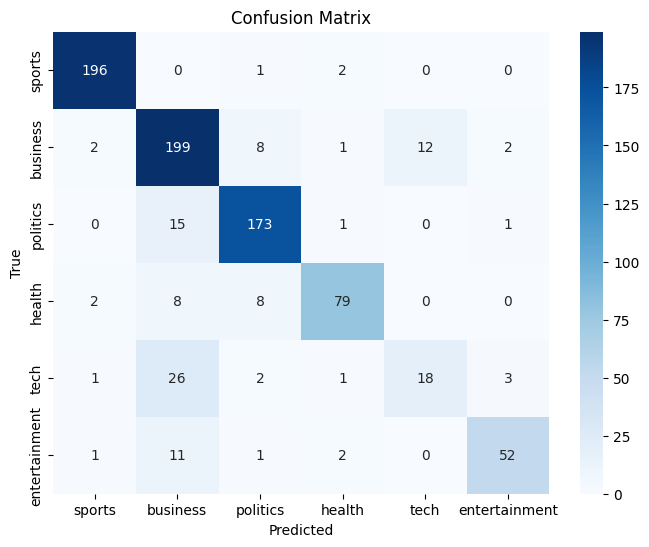


=== TF-IDF на очищенных данных ===
Количество пропущенных слов в тестовом наборе: 997
F1-score: 0.8567
Confusion Matrix:
[[197   0   2   0   0   0]
 [  2 209   7   0   4   2]
 [  1  14 174   1   0   0]
 [  3  11   7  76   0   0]
 [  2  32   2   0  12   3]
 [  3  13   0   1   0  50]]
               precision    recall  f1-score   support

       sports       0.95      0.99      0.97       199
     business       0.75      0.93      0.83       224
     politics       0.91      0.92      0.91       190
       health       0.97      0.78      0.87        97
         tech       0.75      0.24      0.36        51
entertainment       0.91      0.75      0.82        67

     accuracy                           0.87       828
    macro avg       0.87      0.77      0.79       828
 weighted avg       0.87      0.87      0.86       828



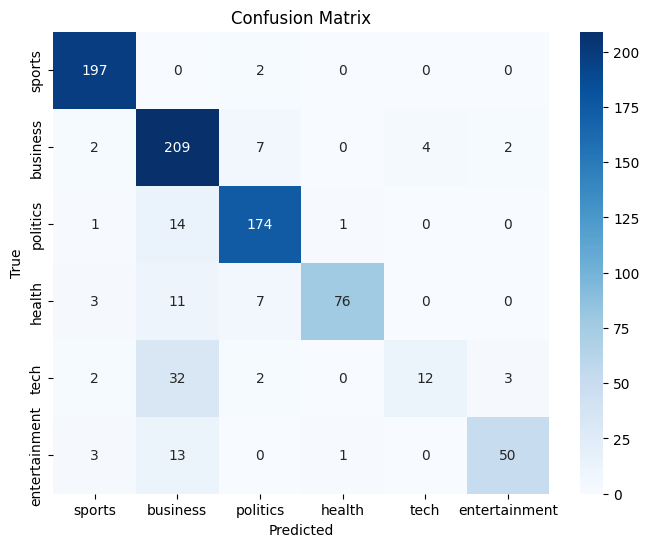


=== BoW на исходных данных ===
Количество пропущенных слов в тестовом наборе: 5783
F1-score: 0.8568
Confusion Matrix:
[[195   1   1   2   0   0]
 [  2 198   8   1  13   2]
 [  0  17 170   2   0   1]
 [  4   8   4  80   0   1]
 [  1  24   2   2  19   3]
 [  2  10   3   1   0  51]]
               precision    recall  f1-score   support

       sports       0.96      0.98      0.97       199
     business       0.77      0.88      0.82       224
     politics       0.90      0.89      0.90       190
       health       0.91      0.82      0.86        97
         tech       0.59      0.37      0.46        51
entertainment       0.88      0.76      0.82        67

     accuracy                           0.86       828
    macro avg       0.83      0.79      0.80       828
 weighted avg       0.86      0.86      0.86       828



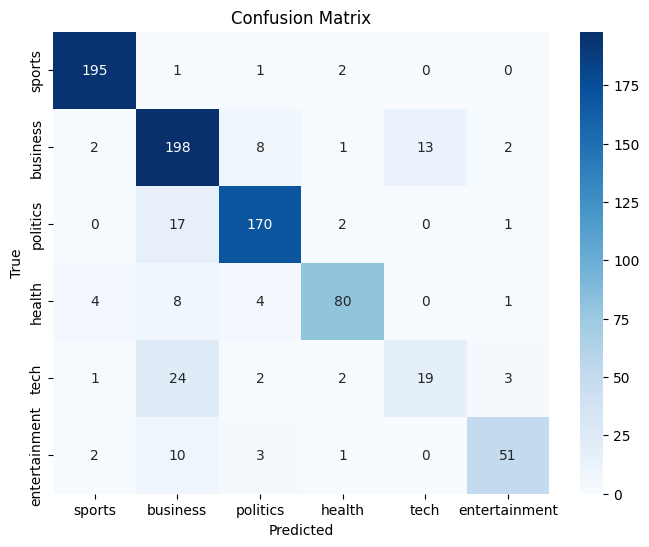


=== TF-IDF на исходных данных ===
Количество пропущенных слов в тестовом наборе: 5783
F1-score: 0.8404
Confusion Matrix:
[[196   1   1   1   0   0]
 [  4 206   8   0   4   2]
 [  1  16 172   1   0   0]
 [  5  13   5  74   0   0]
 [  3  33   2   1  10   2]
 [  6  12   0   1   0  48]]
               precision    recall  f1-score   support

       sports       0.91      0.98      0.95       199
     business       0.73      0.92      0.82       224
     politics       0.91      0.91      0.91       190
       health       0.95      0.76      0.85        97
         tech       0.71      0.20      0.31        51
entertainment       0.92      0.72      0.81        67

     accuracy                           0.85       828
    macro avg       0.86      0.75      0.77       828
 weighted avg       0.86      0.85      0.84       828



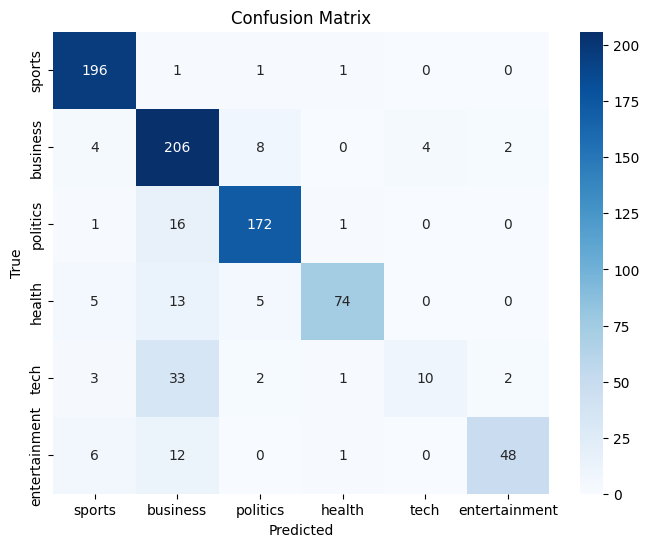

In [26]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix, classification_report
import itertools
import matplotlib.pyplot as plt
import seaborn as sns



# Функция для применения BoW или TF-IDF с учетом разных словарей
def apply_vectorizer(train_texts, test_texts, vectorizer):
    # Обучение векторизатора на тренировочных данных
    vectorizer.fit(train_texts)
    train_features = vectorizer.transform(train_texts)
    test_features = vectorizer.transform(test_texts)

    # Подсчет пропущенных слов в тестовом наборе
    test_vocab = set(itertools.chain.from_iterable(test_texts.apply(lambda x: x.split())))
    train_vocab = set(vectorizer.get_feature_names_out())
    missing_words = test_vocab - train_vocab
    print(f"Количество пропущенных слов в тестовом наборе: {len(missing_words)}")

    return train_features, test_features

# Функция для отображения confusion matrix с названиями классов
def plot_confusion_matrix(conf_matrix, class_names, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

# Функция для обучения и оценки модели
def train_and_evaluate(train_features, test_features, train_labels, test_labels, class_names):
    # Обучение модели Logistic Regression
    model = LogisticRegression(max_iter=1000, random_state=42)  # Увеличиваем max_iter для сходимости
    model.fit(train_features, train_labels)

    # Предсказание на тестовом наборе
    predictions = model.predict(test_features)

    # Оценка качества
    f1 = f1_score(test_labels, predictions, average='weighted')
    conf_matrix = confusion_matrix(test_labels, predictions)
    print(f"F1-score: {f1:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print(classification_report(test_labels, predictions, target_names=class_names))

    # Отображение confusion matrix с названиями классов
    plot_confusion_matrix(conf_matrix, class_names, "Confusion Matrix")

# Эксперименты
def run_experiments(train_texts, test_texts, train_labels, test_labels, class_names):
    # BoW на очищенных данных
    print("\n=== BoW на очищенных данных ===")
    bow_vectorizer = CountVectorizer()
    train_bow, test_bow = apply_vectorizer(train_texts['Text_cleaned'], test_texts['Text_cleaned'], bow_vectorizer)
    train_and_evaluate(train_bow, test_bow, train_labels, test_labels, class_names)

    # TF-IDF на очищенных данных
    print("\n=== TF-IDF на очищенных данных ===")
    tfidf_vectorizer = TfidfVectorizer()
    train_tfidf, test_tfidf = apply_vectorizer(train_texts['Text_cleaned'], test_texts['Text_cleaned'], tfidf_vectorizer)
    train_and_evaluate(train_tfidf, test_tfidf, train_labels, test_labels, class_names)

    # BoW на исходных данных
    print("\n=== BoW на исходных данных ===")
    bow_vectorizer_raw = CountVectorizer()
    train_bow_raw, test_bow_raw = apply_vectorizer(train_texts['Text'], test_texts['Text'], bow_vectorizer_raw)
    train_and_evaluate(train_bow_raw, test_bow_raw, train_labels, test_labels, class_names)

    # TF-IDF на исходных данных
    print("\n=== TF-IDF на исходных данных ===")
    tfidf_vectorizer_raw = TfidfVectorizer()
    train_tfidf_raw, test_tfidf_raw = apply_vectorizer(train_texts['Text'], test_texts['Text'], tfidf_vectorizer_raw)
    train_and_evaluate(train_tfidf_raw, test_tfidf_raw, train_labels, test_labels, class_names)

# Запуск экспериментов
class_names = df_train['Category'].unique()  # Названия классов
run_experiments(df_train, df_test, df_train['Category_int'], df_test['Category_int'], class_names)

fasttext

In [12]:
import fasttext.util
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка предобученной модели FastText
# fasttext.util.download_model('en', if_exists='ignore')  # Скачиваем модель для английского языка
ft = fasttext.load_model('cc.en.300.bin')  # Загружаем модель



=== FastText на очищенных данных ===
F1-score: 0.8693
Confusion Matrix:
[[189   2   4   3   0   1]
 [  0 213   5   1   4   1]
 [  2  13 173   2   0   0]
 [  4  12   9  72   0   0]
 [  1  20   4   2  22   2]
 [  4   6   1   0   1  55]]
               precision    recall  f1-score   support

       sports       0.94      0.95      0.95       199
     business       0.80      0.95      0.87       224
     politics       0.88      0.91      0.90       190
       health       0.90      0.74      0.81        97
         tech       0.81      0.43      0.56        51
entertainment       0.93      0.82      0.87        67

     accuracy                           0.87       828
    macro avg       0.88      0.80      0.83       828
 weighted avg       0.88      0.87      0.87       828



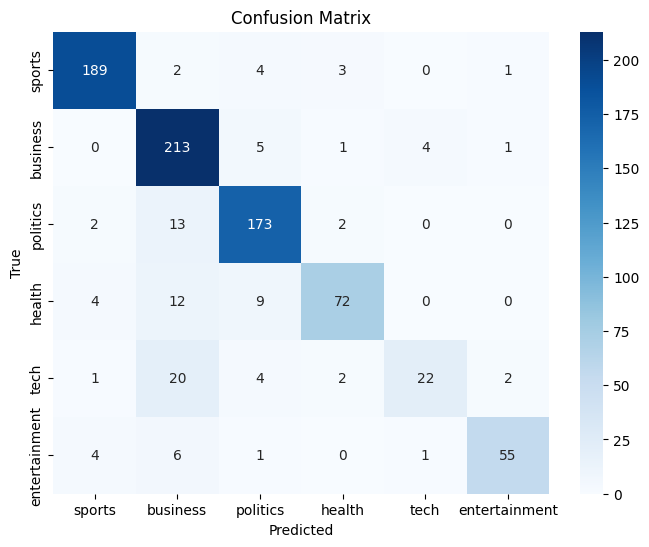


=== FastText на исходных данных ===
F1-score: 0.8325
Confusion Matrix:
[[192   2   4   0   0   1]
 [  3 207   9   1   3   1]
 [  2  16 170   2   0   0]
 [  4  16  11  66   0   0]
 [  2  28   5   3  10   3]
 [  2   7   2   0   1  55]]
               precision    recall  f1-score   support

       sports       0.94      0.96      0.95       199
     business       0.75      0.92      0.83       224
     politics       0.85      0.89      0.87       190
       health       0.92      0.68      0.78        97
         tech       0.71      0.20      0.31        51
entertainment       0.92      0.82      0.87        67

     accuracy                           0.85       828
    macro avg       0.85      0.75      0.77       828
 weighted avg       0.85      0.85      0.83       828



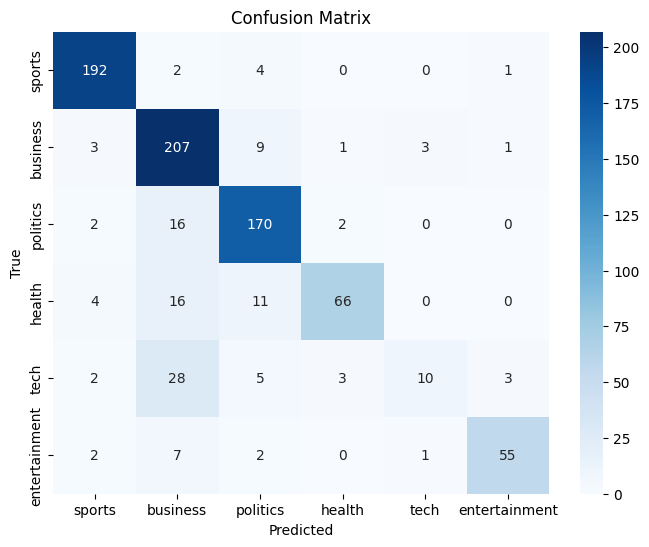

In [13]:

# Функция для извлечения векторов FastText
def extract_fasttext_features(texts):
    features = []
    for text in texts:
        tokens = text.split()  # Разбиваем текст на слова
        if len(tokens) == 0:
            raise Exception("Обнаружен пустой текст")  # Если текст пустой, вызываем ошибку
        else:
            vectors = [ft.get_word_vector(word) for word in tokens]  # Получаем векторы для каждого слова
            avg_vector = np.mean(vectors, axis=0)  # Средний вектор для всего текста
            features.append(avg_vector)
    return np.array(features)

# Функция для обучения и оценки модели
def train_and_evaluate_fasttext(train_features, test_features, train_labels, test_labels, class_names):
    # Обучение модели Logistic Regression
    model = LogisticRegression(max_iter=1000, random_state=42)
    model.fit(train_features, train_labels)

    # Предсказание на тестовом наборе
    predictions = model.predict(test_features)

    # Оценка качества
    f1 = f1_score(test_labels, predictions, average='weighted')
    conf_matrix = confusion_matrix(test_labels, predictions)
    print(f"F1-score: {f1:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print(classification_report(test_labels, predictions, target_names=class_names))

    # Отображение confusion matrix с названиями классов
    plot_confusion_matrix(conf_matrix, class_names, "Confusion Matrix")

# Функция для отображения confusion matrix с названиями классов
def plot_confusion_matrix(conf_matrix, class_names, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

# Эксперименты с FastText
def run_fasttext_experiments(train_texts, test_texts, train_labels, test_labels, class_names):
    # FastText на очищенных данных
    print("\n=== FastText на очищенных данных ===")
    train_features_cleaned = extract_fasttext_features(train_texts['Text_cleaned'])
    test_features_cleaned = extract_fasttext_features(test_texts['Text_cleaned'])
    train_and_evaluate_fasttext(train_features_cleaned, test_features_cleaned, train_labels, test_labels, class_names)

    # FastText на исходных данных
    print("\n=== FastText на исходных данных ===")
    train_features_raw = extract_fasttext_features(train_texts['Text'])
    test_features_raw = extract_fasttext_features(test_texts['Text'])
    train_and_evaluate_fasttext(train_features_raw, test_features_raw, train_labels, test_labels, class_names)

# Запуск экспериментов
class_names = df_train['Category'].unique()  # Названия классов
run_fasttext_experiments(df_train, df_test, df_train['Category_int'], df_test['Category_int'], class_names)


=== FastText на очищенных данных (Title + Excerpt) ===
F1-score: 0.8804
Confusion Matrix:
[[191   1   3   3   0   1]
 [  0 208   5   1   7   3]
 [  3  14 171   2   0   0]
 [  4   7   7  79   0   0]
 [  0  18   3   0  27   3]
 [  3   7   1   0   1  55]]
               precision    recall  f1-score   support

       sports       0.95      0.96      0.95       199
     business       0.82      0.93      0.87       224
     politics       0.90      0.90      0.90       190
       health       0.93      0.81      0.87        97
         tech       0.77      0.53      0.63        51
entertainment       0.89      0.82      0.85        67

     accuracy                           0.88       828
    macro avg       0.88      0.83      0.85       828
 weighted avg       0.88      0.88      0.88       828



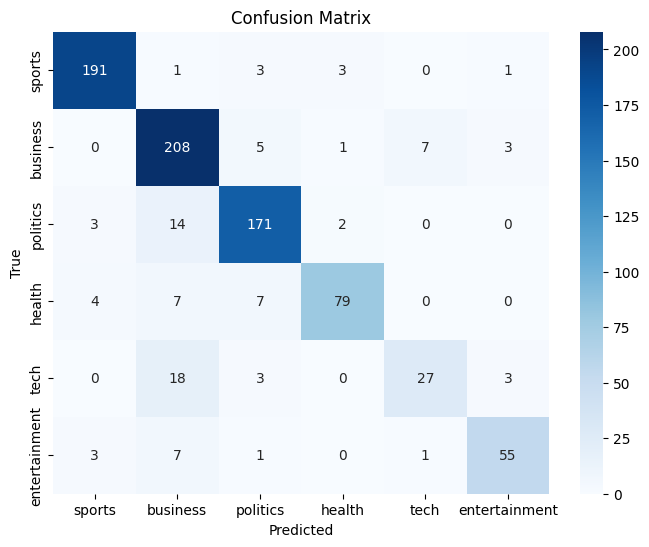


=== FastText на исходных данных (Title + Excerpt) ===
F1-score: 0.8808
Confusion Matrix:
[[192   1   4   1   0   1]
 [  0 208   8   1   6   1]
 [  2  14 172   2   0   0]
 [  3  10   8  75   0   1]
 [  0  18   2   1  25   5]
 [  1   4   1   0   1  60]]
               precision    recall  f1-score   support

       sports       0.97      0.96      0.97       199
     business       0.82      0.93      0.87       224
     politics       0.88      0.91      0.89       190
       health       0.94      0.77      0.85        97
         tech       0.78      0.49      0.60        51
entertainment       0.88      0.90      0.89        67

     accuracy                           0.88       828
    macro avg       0.88      0.83      0.84       828
 weighted avg       0.89      0.88      0.88       828



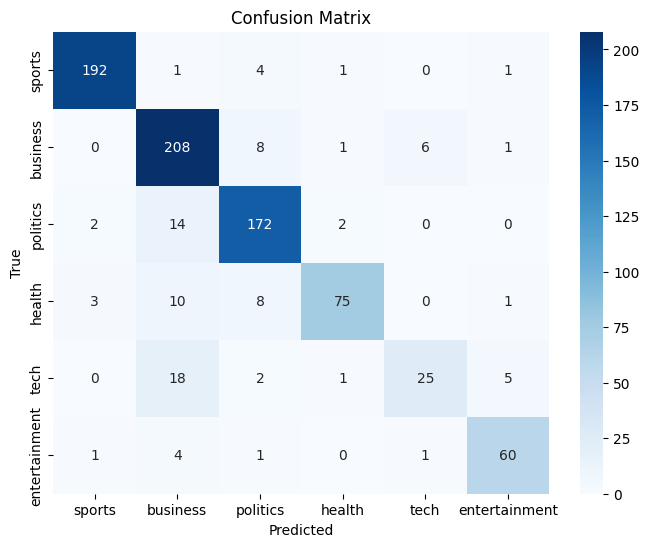

In [14]:

# Функция для извлечения векторов FastText для одного текста
def extract_fasttext_vector(text):
    tokens = text.split()  # Разбиваем текст на слова
    if len(tokens) == 0:
        raise Exception("Обнаружен пустой текст")  # Если текст пустой, вызываем ошибку
    else:
        vectors = [ft.get_word_vector(word) for word in tokens]  # Получаем векторы для каждого слова
        avg_vector = np.mean(vectors, axis=0)  # Средний вектор для всего текста
        return avg_vector

# Функция для извлечения суммы векторов для Title и Excerpt
def extract_summed_features(titles, excerpts):
    title_vectors = np.array([extract_fasttext_vector(title) for title in titles])
    excerpt_vectors = np.array([extract_fasttext_vector(excerpt) for excerpt in excerpts])
    return title_vectors + excerpt_vectors  # Сумма векторов

# Функция для обучения и оценки модели
def train_and_evaluate_fasttext(train_features, test_features, train_labels, test_labels, class_names):
    # Обучение модели Logistic Regression
    model = LogisticRegression(max_iter=1000, random_state=42)
    model.fit(train_features, train_labels)

    # Предсказание на тестовом наборе
    predictions = model.predict(test_features)

    # Оценка качества
    f1 = f1_score(test_labels, predictions, average='weighted')
    conf_matrix = confusion_matrix(test_labels, predictions)
    print(f"F1-score: {f1:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print(classification_report(test_labels, predictions, target_names=class_names))

    # Отображение confusion matrix с названиями классов
    plot_confusion_matrix(conf_matrix, class_names, "Confusion Matrix")

# Функция для отображения confusion matrix с названиями классов
def plot_confusion_matrix(conf_matrix, class_names, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

# Эксперименты с FastText
def run_fasttext_experiments(train_data, test_data, train_labels, test_labels, class_names):
    # FastText на очищенных данных
    print("\n=== FastText на очищенных данных (Title + Excerpt) ===")
    train_features_cleaned = extract_summed_features(train_data['Title_cleaned'], train_data['Excerpt_cleaned'])
    test_features_cleaned = extract_summed_features(test_data['Title_cleaned'], test_data['Excerpt_cleaned'])
    train_and_evaluate_fasttext(train_features_cleaned, test_features_cleaned, train_labels, test_labels, class_names)

    # FastText на исходных данных
    print("\n=== FastText на исходных данных (Title + Excerpt) ===")
    train_features_raw = extract_summed_features(train_data['Title'], train_data['Excerpt'])
    test_features_raw = extract_summed_features(test_data['Title'], test_data['Excerpt'])
    train_and_evaluate_fasttext(train_features_raw, test_features_raw, train_labels, test_labels, class_names)

# Запуск экспериментов
class_names = df_train['Category'].unique()  # Названия классов
run_fasttext_experiments(df_train, df_test, df_train['Category_int'], df_test['Category_int'], class_names)

In [ ]:
  del ft

ELMo

In [31]:
import tensorflow as tf

# Проверка доступности GPU
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    print("GPU доступен:", gpus)
else:
    print("GPU не доступен, будет использоваться CPU.")

GPU доступен: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]



=== ELMo на очищенных данных (Title + Excerpt) ===


100%|██████████| 828/828 [00:47<00:00, 17.33it/s]


F1-score: 0.8599
Confusion Matrix:
[[190   1   3   3   0   2]
 [  1 198   3   4  16   2]
 [  1  15 171   2   1   0]
 [  5   9   6  75   2   0]
 [  0  23   0   1  24   3]
 [  2   7   1   2   0  55]]
               precision    recall  f1-score   support

       sports       0.95      0.95      0.95       199
     business       0.78      0.88      0.83       224
     politics       0.93      0.90      0.91       190
       health       0.86      0.77      0.82        97
         tech       0.56      0.47      0.51        51
entertainment       0.89      0.82      0.85        67

     accuracy                           0.86       828
    macro avg       0.83      0.80      0.81       828
 weighted avg       0.86      0.86      0.86       828



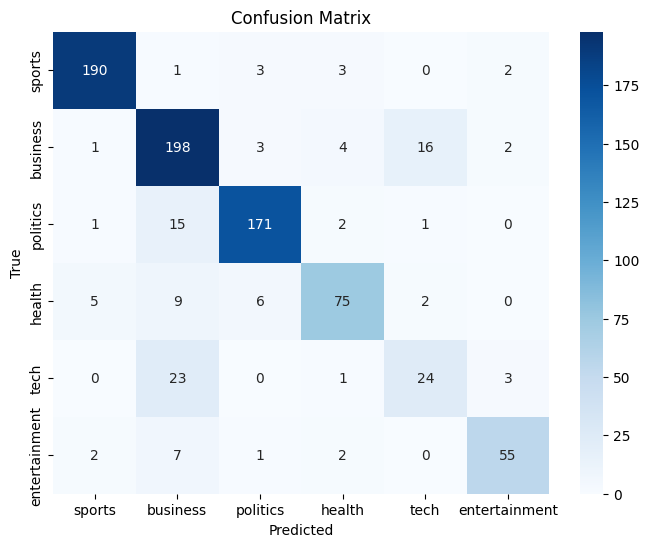


=== ELMo на исходных данных (Title + Excerpt) ===


100%|██████████| 828/828 [01:09<00:00, 11.99it/s]


F1-score: 0.8761
Confusion Matrix:
[[193   0   2   1   0   3]
 [  0 200   2   2  18   2]
 [  0  17 169   3   1   0]
 [  3   8   4  82   0   0]
 [  0  24   1   0  23   3]
 [  1   5   1   0   1  59]]
               precision    recall  f1-score   support

       sports       0.98      0.97      0.97       199
     business       0.79      0.89      0.84       224
     politics       0.94      0.89      0.92       190
       health       0.93      0.85      0.89        97
         tech       0.53      0.45      0.49        51
entertainment       0.88      0.88      0.88        67

     accuracy                           0.88       828
    macro avg       0.84      0.82      0.83       828
 weighted avg       0.88      0.88      0.88       828



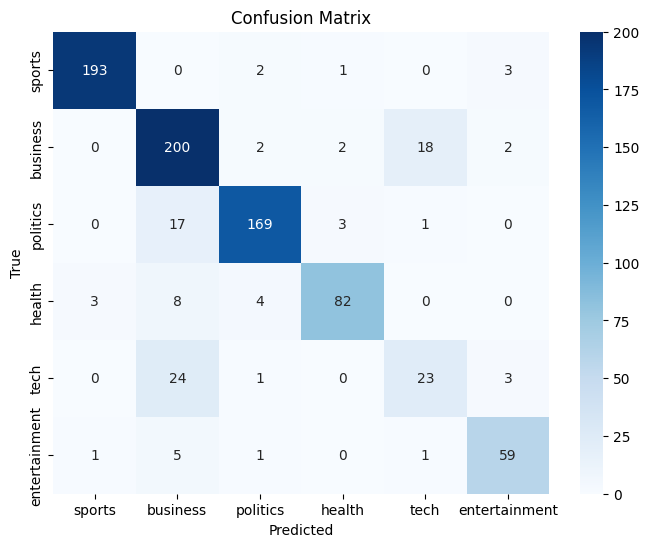

In [32]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm


# Загрузка модели ELMo из TensorFlow Hub
elmo = hub.load("https://tfhub.dev/google/elmo/2").signatures["default"]

# Функция для извлечения векторов ELMo для объединенного текста
def extract_elmo_vector(text):
    if isinstance(text, str):
        # Преобразование текста в тензор
        embeddings = elmo(tf.constant([text]))["elmo"]
        # Средний вектор из всех слов
        avg_vector = np.mean(embeddings, axis=1).squeeze()
        return avg_vector
    return np.zeros(1024)  # Если текст не строка, возвращаем нулевой вектор

# Функция для извлечения векторов для объединенных текстов
def extract_features(texts):
    return np.array([extract_elmo_vector(text) for text in tqdm(texts, total=len(texts))])

# Функция для обучения и оценки модели
def train_and_evaluate_elmo(train_features, test_features, train_labels, test_labels, class_names):
    # Обучение модели Logistic Regression
    model = LogisticRegression(max_iter=1000, random_state=42)
    model.fit(train_features, train_labels)

    # Предсказание на тестовом наборе
    predictions = model.predict(test_features)

    # Оценка качества
    f1 = f1_score(test_labels, predictions, average='weighted')
    conf_matrix = confusion_matrix(test_labels, predictions)
    print(f"F1-score: {f1:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print(classification_report(test_labels, predictions, target_names=class_names))

    # Отображение confusion matrix с названиями классов
    plot_confusion_matrix(conf_matrix, class_names, "Confusion Matrix")

# Функция для отображения confusion matrix с названиями классов
def plot_confusion_matrix(conf_matrix, class_names, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

# Эксперименты с ELMo
def run_elmo_experiments(train_data, test_data, train_labels, test_labels, class_names):
    # ELMo на очищенных данных
    print("\n=== ELMo на очищенных данных (Title + Excerpt) ===")
    train_data['Combined_cleaned'] = train_data['Title_cleaned'] + " " + train_data['Excerpt_cleaned']
    test_data['Combined_cleaned'] = test_data['Title_cleaned'] + " " + test_data['Excerpt_cleaned']
    train_features_cleaned = extract_features(train_data['Combined_cleaned'])
    test_features_cleaned = extract_features(test_data['Combined_cleaned'])
    train_and_evaluate_elmo(train_features_cleaned, test_features_cleaned, train_labels, test_labels, class_names)

    # ELMo на исходных данных
    print("\n=== ELMo на исходных данных (Title + Excerpt) ===")
    train_data['Combined_raw'] = train_data['Title'] + " " + train_data['Excerpt']
    test_data['Combined_raw'] = test_data['Title'] + " " + test_data['Excerpt']
    train_features_raw = extract_features(train_data['Combined_raw'])
    test_features_raw = extract_features(test_data['Combined_raw'])
    train_and_evaluate_elmo(train_features_raw, test_features_raw, train_labels, test_labels, class_names)

# Запуск экспериментов
class_names = df_train['Category'].unique()  # Названия классов
run_elmo_experiments(df_train, df_test, df_train['Category_int'], df_test['Category_int'], class_names)

BERT

In [29]:
from transformers import BertTokenizer, BertModel
import torch
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Проверка доступности GPU
if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f"GPU доступен: {torch.cuda.get_device_name(0)}")
else:
    device = torch.device("cpu")
    print("GPU не доступен, будет использоваться CPU.")

# Инициализация BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased').to(device)  # Перенос модели на GPU

GPU доступен: Tesla T4



=== BERT на очищенных данных (Title + Excerpt) ===


100%|██████████| 828/828 [00:08<00:00, 103.25it/s]


F1-score: 0.8755
Confusion Matrix:
[[195   0   1   1   0   2]
 [  1 199   4   4  14   2]
 [  0  14 171   3   1   1]
 [  2   9   3  83   0   0]
 [  0  23   1   0  25   2]
 [  3   8   1   1   1  53]]
               precision    recall  f1-score   support

       sports       0.97      0.98      0.97       199
     business       0.79      0.89      0.83       224
     politics       0.94      0.90      0.92       190
       health       0.90      0.86      0.88        97
         tech       0.61      0.49      0.54        51
entertainment       0.88      0.79      0.83        67

     accuracy                           0.88       828
    macro avg       0.85      0.82      0.83       828
 weighted avg       0.88      0.88      0.88       828



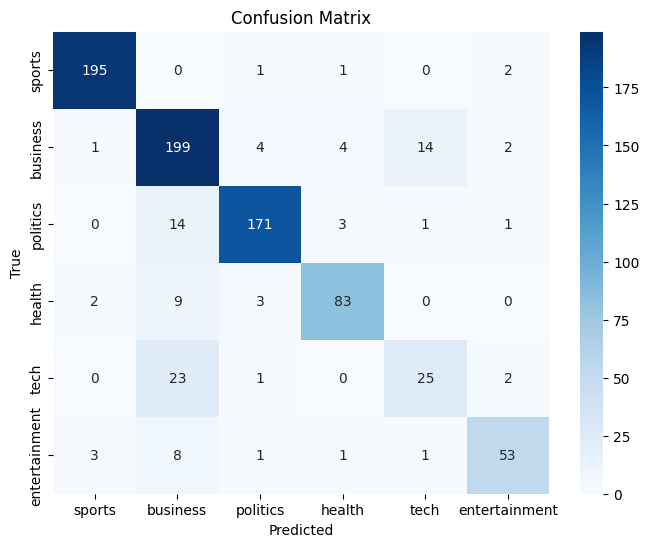


=== BERT на исходных данных (Title + Excerpt) ===


100%|██████████| 828/828 [00:08<00:00, 93.00it/s]


F1-score: 0.8892
Confusion Matrix:
[[194   0   1   1   0   3]
 [  1 204   2   2  13   2]
 [  0  12 176   2   0   0]
 [  2   9   1  85   0   0]
 [  0  25   0   0  23   3]
 [  1   5   1   3   1  56]]
               precision    recall  f1-score   support

       sports       0.98      0.97      0.98       199
     business       0.80      0.91      0.85       224
     politics       0.97      0.93      0.95       190
       health       0.91      0.88      0.89        97
         tech       0.62      0.45      0.52        51
entertainment       0.88      0.84      0.85        67

     accuracy                           0.89       828
    macro avg       0.86      0.83      0.84       828
 weighted avg       0.89      0.89      0.89       828



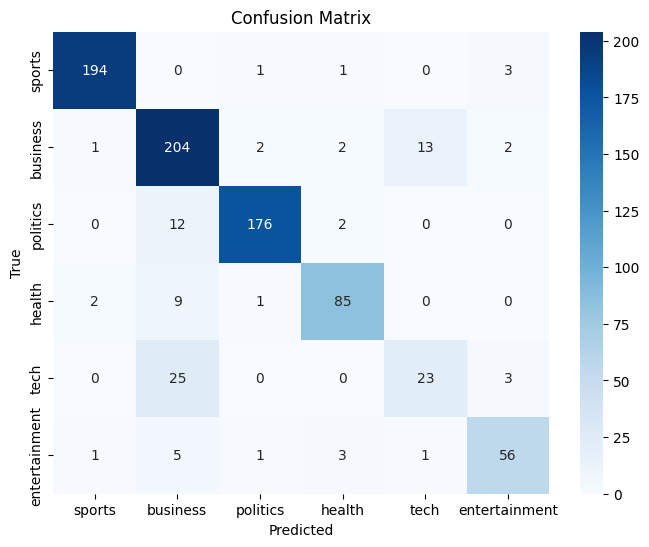

In [30]:
from tqdm import tqdm


# Функция для извлечения векторов BERT для объединенного текста
def extract_bert_vector(text):
    if isinstance(text, str):
        # Токенизация текста
        inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
        inputs = {key: value.to(device) for key, value in inputs.items()}  # Перенос данных на GPU
        # Получение векторов из BERT
        with torch.no_grad():
            outputs = model(**inputs)
        # Средний вектор из последнего слоя BERT
        avg_vector = outputs.last_hidden_state.mean(dim=1).squeeze().cpu().numpy()  # Перенос результата на CPU
        return avg_vector
    return np.zeros(768)  # Если текст не строка, возвращаем нулевой вектор

# Функция для извлечения векторов для объединенных текстов
def extract_features(texts):
    return np.array([extract_bert_vector(text) for text in tqdm(texts, total=len(texts))])

# Функция для обучения и оценки модели
def train_and_evaluate_bert(train_features, test_features, train_labels, test_labels, class_names):
    # Обучение модели Logistic Regression
    model = LogisticRegression(max_iter=1000, random_state=42)
    model.fit(train_features, train_labels)

    # Предсказание на тестовом наборе
    predictions = model.predict(test_features)

    # Оценка качества
    f1 = f1_score(test_labels, predictions, average='weighted')
    conf_matrix = confusion_matrix(test_labels, predictions)
    print(f"F1-score: {f1:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print(classification_report(test_labels, predictions, target_names=class_names))

    # Отображение confusion matrix с названиями классов
    plot_confusion_matrix(conf_matrix, class_names, "Confusion Matrix")

# Функция для отображения confusion matrix с названиями классов
def plot_confusion_matrix(conf_matrix, class_names, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

# Эксперименты с BERT
def run_bert_experiments(train_data, test_data, train_labels, test_labels, class_names):
    # BERT на очищенных данных
    print("\n=== BERT на очищенных данных (Title + Excerpt) ===")
    train_data['Combined_cleaned'] = train_data['Title_cleaned'] + " " + train_data['Excerpt_cleaned']
    test_data['Combined_cleaned'] = test_data['Title_cleaned'] + " " + test_data['Excerpt_cleaned']
    train_features_cleaned = extract_features(train_data['Combined_cleaned'])
    test_features_cleaned = extract_features(test_data['Combined_cleaned'])
    train_and_evaluate_bert(train_features_cleaned, test_features_cleaned, train_labels, test_labels, class_names)

    # BERT на исходных данных
    print("\n=== BERT на исходных данных (Title + Excerpt) ===")
    train_data['Combined_raw'] = train_data['Title'] + " " + train_data['Excerpt']
    test_data['Combined_raw'] = test_data['Title'] + " " + test_data['Excerpt']
    train_features_raw = extract_features(train_data['Combined_raw'])
    test_features_raw = extract_features(test_data['Combined_raw'])
    train_and_evaluate_bert(train_features_raw, test_features_raw, train_labels, test_labels, class_names)

# Запуск экспериментов
class_names = df_train['Category'].unique()  # Названия классов
run_bert_experiments(df_train, df_test, df_train['Category_int'], df_test['Category_int'], class_names)